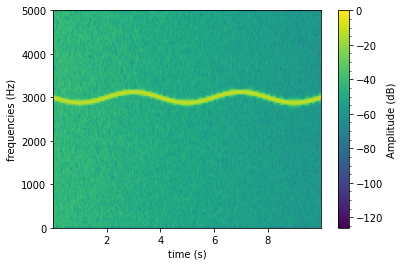

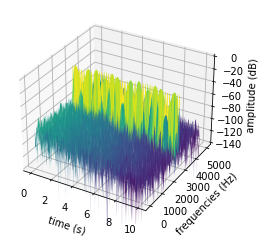

In [1]:
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(666)

# title = ('2 Vrms sine wave with modulated frequency around 3kHz, '
#          'corrupted by white noise of exponentially decreasing '
#          'magnitude sampled at 10 kHz.')

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
t = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*t)
carrier = amp * np.sin(2*np.pi*3e3*t + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=t.shape)
noise *= np.exp(-t/5)
y = carrier + noise * 0.1

def specgram3d(y, srate=44100, ax=None, title=None):
    if not ax:
        ax = plt.axes(projection='3d')
    ax.set_title(title, loc='center', wrap=True)
    spec, freqs, t = mlab.specgram(y, Fs=srate)
    X, Y, Z = t[None, :], freqs[:, None],  20.0 * np.log10(spec)
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('time (s)')
    ax.set_ylabel('frequencies (Hz)')
    ax.set_zlabel('amplitude (dB)')
    ax.set_zlim(-140, 0)
    return X, Y, Z

def specgram2d(y, srate=44100, ax=None, title=None):
    if not ax:
        ax = plt.axes()
    ax.set_title(title, loc='center', wrap=True)
    spec, freqs, t, im = ax.specgram(y, Fs=fs, scale='dB', vmax=0)
    ax.set_xlabel('time (s)')
    ax.set_ylabel('frequencies (Hz)')
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Amplitude (dB)')
    cbar.minorticks_on()
    return spec, freqs, t, im

fig1, ax1 = plt.subplots()
# specgram2d(y, srate=fs, title=title, ax=ax1)
specgram2d(y, srate=fs, ax=ax1)

fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
# specgram3d(y, srate=fs, title=title, ax=ax2)
specgram3d(y, srate=fs, ax=ax2)
  
plt.show()

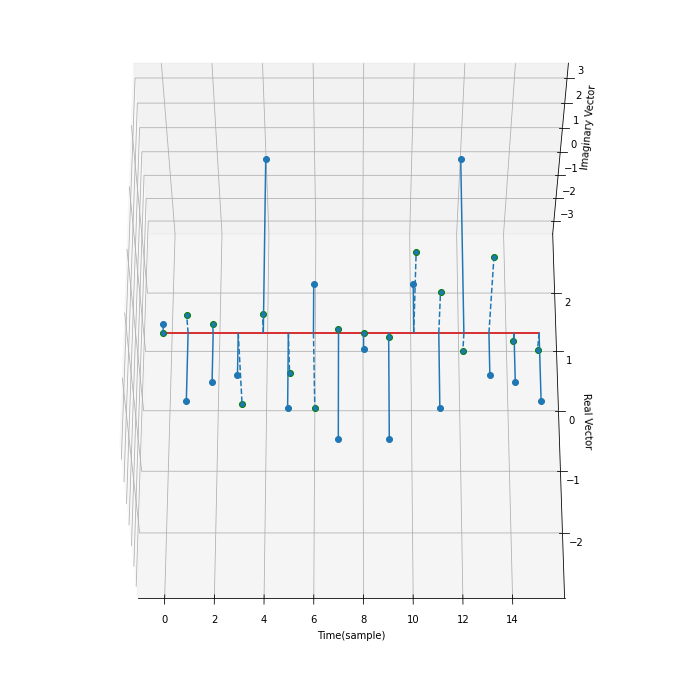

In [2]:
import numpy as np
import matplotlib.pyplot as plt

size = 16
xn = np.arange(size)
yn = np.zeros(size)
zn = np.zeros(size)
for index in range(size):
    zn[index] = (np.random.random() - 0.5) * 2

Zn = np.fft.fft(zn)


fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(projection='3d')

# plot real axis
ax.stem(xn, Zn.real, yn, orientation='y')

# plot imaginary axis
(markers, stemlines, baseline) = ax.stem(xn, yn, Zn.imag, linefmt='--')
plt.setp(markers, markeredgecolor="green")

# ax.set_xlim3d(0, size//2)
ax.set_ylim3d(-max(abs(Zn.real)), max(abs(Zn.real)))
ax.set_zlim3d(-max(abs(Zn.imag)), max(abs(Zn.imag)))  
ax.set_xlabel('Time(sample)')
ax.set_ylabel('Real Vector')
ax.set_zlabel('Imaginary Vector')

elevation = 60
angle = 270
ax.view_init(elev = elevation, azim=angle)
plt.show()

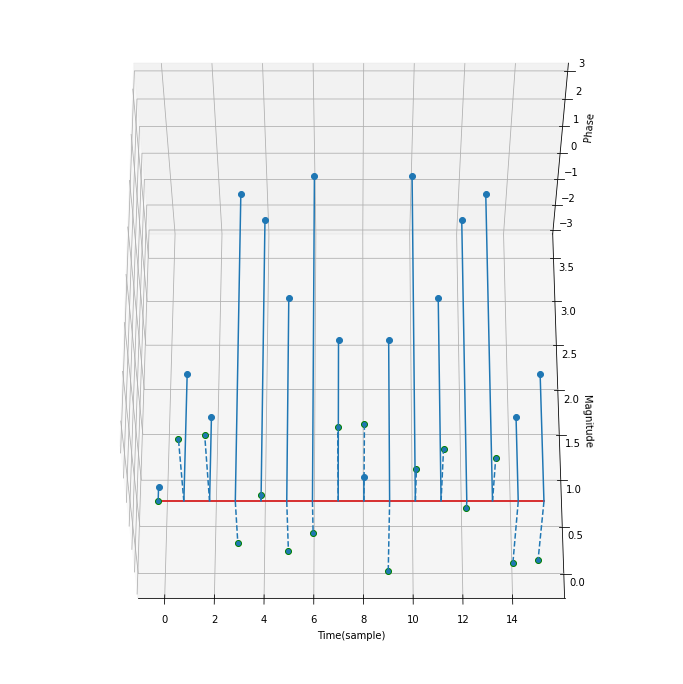

In [3]:
magnitude = np.abs(Zn)
phase = np.angle(Zn)

fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(projection='3d')


# plot real axis
ax.stem(xn, magnitude, yn, orientation='y')

# plot imaginary axis
(markers, stemlines, baseline) = ax.stem(xn, yn, phase, linefmt='--')
plt.setp(markers, markeredgecolor="green")

# ax.set_xlim3d(0, size//2)
# ax.set_ylim3d(-max(abs(magnitude)), max(abs(magnitude)))
# ax.set_zlim3d(-max(abs(Zn.imag)), max(abs(Zn.imag)))  
ax.set_xlabel('Time(sample)')
ax.set_ylabel('Magnitude')
ax.set_zlabel('Phase')

elevation = 60
angle = 270
ax.view_init(elev = elevation, azim=angle)
plt.show()